## Small Image Classification Using Convolution Neural Network
In this notebook, we will classify small images cifar10 dataset from tensorflow keras datasets. There are total 10 classes as shown below. We will use CNN for classification

In [38]:
import tensorflow as tensorflow
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [27]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape # We have 50000 images and each image has 32 x 32 x 3 size. 3 is RBG.

(50000, 32, 32, 3)

Here we see there are 5,000 training images and 1000 test images.

In [28]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D array, for our classification having 1D array is good enough. So we will convert this to now 1d array.

In [29]:
y_train = y_train.reshape(-1)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [30]:
y_test = y_test.reshape(-1)

In [31]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [32]:
y_train[0]

6

Let's plot some images to see what they are.

In [33]:
def plot_sample(X, y, index):
    plt.figure(figsize=(10, 2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

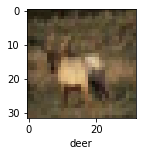

In [34]:
plot_sample(X_train, y_train, 3)

Next, Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255
### Normalizing the training datra

In [37]:
X_train = X_train/255
X_test = X_test/255

### Built simple artificial neural network for image classification

In [39]:
import tensorflow as tf
from tensorflow import keras

ann = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)), # Input layers is a flatten layer.
    keras.layers.Dense(3000, activation = 'relu'), # 3000 neurons
    keras.layers.Dense(1000, activation = 'relu'), # 1000 neurons
    keras.layers.Dense(10, activation = 'sigmoid')  # output has 10 categories  
])

ann.compile(optimizer = 'SGD',
            loss= 'sparse_categorical_crossentropy',
            metrics = ['accuracy']
            )
ann.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 54s 34ms/step - loss: 1.8138 - accuracy: 0.3531
Epoch 2/5
1563/1563 [==============================] - 52s 33ms/step - loss: 1.6244 - accuracy: 0.4297
Epoch 3/5
1563/1563 [==============================] - 50s 32ms/step - loss: 1.5404 - accuracy: 0.4575
Epoch 4/5
1563/1563 [==============================] - 47s 30ms/step - loss: 1.4819 - accuracy: 0.4798
Epoch 5/5
1563/1563 [==============================] - 48s 31ms/step - loss: 1.4295 - accuracy: 0.4966


You can see that at the end of 5 epochs, the accuracy is at around 49 percent.

In [41]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.49      0.67      0.57      1000
           1       0.48      0.77      0.59      1000
           2       0.41      0.22      0.29      1000
           3       0.42      0.23      0.30      1000
           4       0.32      0.61      0.42      1000
           5       0.44      0.30      0.36      1000
           6       0.48      0.60      0.54      1000
           7       0.57      0.51      0.54      1000
           8       0.70      0.51      0.59      1000
           9       0.66      0.34      0.45      1000

    accuracy                           0.47     10000
   macro avg       0.50      0.47      0.46     10000
weighted avg       0.50      0.47      0.46     10000



### Now let us build a convolutional neural network to train our images

In [65]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape = (32, 32, 3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

In [70]:
cnn.compile(optimizer='adam',
        loss = 'sparse_categorical_crossentropy',
        metrics=['accuracy'])

In [71]:
cnn.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 17s 11ms/step - loss: 1.0661 - accuracy: 0.6285
Epoch 2/5
1563/1563 [==============================] - 19s 12ms/step - loss: 0.8930 - accuracy: 0.6869
Epoch 3/5
1563/1563 [==============================] - 18s 12ms/step - loss: 0.7669 - accuracy: 0.7332
Epoch 4/5
1563/1563 [==============================] - 20s 13ms/step - loss: 0.6672 - accuracy: 0.7662
Epoch 5/5
1563/1563 [==============================] - 19s 12ms/step - loss: 0.5788 - accuracy: 0.7969


**With CNN, at the end of 10 epochs, accuracy was at aorund 70% percent which is a significant improvement over ANN. CNN's are the best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as macpooling reduces the image dimensions while still preseving the features.**

In [72]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.9038 - accuracy: 0.7032


[0.9038318395614624, 0.7031999826431274]

In [73]:
y_pred = cnn.predict(X_test)

In [76]:
y_pred_classes = [np.argmax(element) for element in y_pred]
y_pred_classes[:5]

[3, 8, 8, 0, 6]

In [77]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

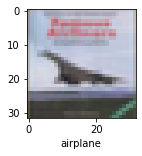

In [78]:
plot_sample(X_test, y_test, 3)

In [79]:
classes[y_pred_classes[3]]

'airplane'

### Exercise
Use CNN to do handwritten digits classification using MNIST dataset. You can use this notebook as a reference: https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/main/1_digits_recognition/digits_recognition_neural_network.ipynb

Above we used ANN for digits classification. You need to modify this code to use CNN instead. Check how accuracy improves fast with CNN and figure out how CNN can be a better choice for doing image classification compared to ANN. Once you have worked on this problem on your own, you can check my solution by clicking on this link: Solution

In [107]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [132]:
(X_train, y_train),(X_test, y_test)=keras.datasets.mnist.load_data()

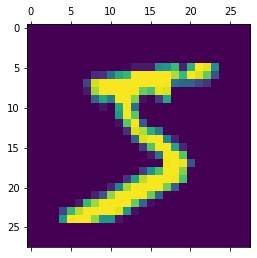

In [109]:
plt.matshow(X_train[0])

In [110]:
y_train[0], y_test[0]

(5, 7)

In [111]:
# Normalize the dataset which the range of value is from 0 to 1.as_integer_ratio
X_train = X_train/255
X_test = X_test/255

In [112]:
a = np.array([1, 10, 30, 5])
np.argmax(a)

2

#### Using ANN for classification

In [113]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(optimizer = 'adam',
                loss = 'sparse_categorical_crossentropy',
                metrics = ['accuracy'])

model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 1s 568us/step - loss: 0.2703 - accuracy: 0.9233
Epoch 2/10
1875/1875 [==============================] - 1s 554us/step - loss: 0.1241 - accuracy: 0.9634
Epoch 3/10
1875/1875 [==============================] - 1s 555us/step - loss: 0.0875 - accuracy: 0.9735
Epoch 4/10
1875/1875 [==============================] - 1s 547us/step - loss: 0.0669 - accuracy: 0.9797
Epoch 5/10
1875/1875 [==============================] - 1s 542us/step - loss: 0.0526 - accuracy: 0.9838
Epoch 6/10
1875/1875 [==============================] - 1s 543us/step - loss: 0.0425 - accuracy: 0.9866
Epoch 7/10
1875/1875 [==============================] - 1s 549us/step - loss: 0.0350 - accuracy: 0.9886
Epoch 8/10
1875/1875 [==============================] - 1s 540us/step - loss: 0.0283 - accuracy: 0.9916
Epoch 9/10
1875/1875 [==============================] - 1s 546us/step - loss: 0.0232 - accuracy: 0.9928
Epoch 10/10
1875/1875 [==============================] - 1s 573u

In [114]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 457us/step - loss: 0.0900 - accuracy: 0.9747


[0.09004531055688858, 0.9746999740600586]

In [116]:
X_train[0].shape

(28, 28)

**We have to reshape the dataset so that it is tuitable for a usage of CNN' training. In the case of RGB such as above example, the last dimension pixels woudl be 3 for the re, green and blue components. In the case of MNIST where the pixel values are a gray scale, the pixel dimension is set to 1.**


We want to change the shape of dataset to (60000, 28, 28, 1) from (60000, 28, 28)

In [141]:
X_train = X_train.reshape(60000, 28, 28, 1)

In [142]:
X_test = X_test.reshape(10000, 28, 28, 1)

### Using CNN for classification

In [143]:
model = keras.Sequential([
    layers.Conv2D(filters=30, input_shape = (28, 28, 1), kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(50, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

In [144]:
model.compile(optimizer = 'adam',
                loss = 'sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [145]:
model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5207 - accuracy: 0.8999
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1003 - accuracy: 0.9712
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0691 - accuracy: 0.9792
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0560 - accuracy: 0.9823
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0441 - accuracy: 0.9865
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0374 - accuracy: 0.9884
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0323 - accuracy: 0.9899
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0240 - accuracy: 0.9926
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0229 - accuracy: 0.9926
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.023

In [146]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1179 - accuracy: 0.9779


[0.117893747985363, 0.9779000282287598]

In [153]:
y_pred = model.predict(X_test)
y_pred = [np.argmax(element) for element in y_pred]

In [154]:
y_pred[:5]

[7, 1, 1, 0, 4]

In [155]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [58]:
output = []
for element in y_pred:
    aa = np.argmax(element)
    output.append(aa)

In [61]:
y_pred.dtype

dtype('float32')

In [63]:
y_pred_classes

[3,
 1,
 0,
 0,
 4,
 6,
 3,
 4,
 4,
 1,
 0,
 9,
 1,
 7,
 1,
 8,
 5,
 4,
 8,
 6,
 4,
 0,
 0,
 1,
 4,
 6,
 4,
 4,
 1,
 6,
 6,
 4,
 4,
 6,
 9,
 1,
 4,
 1,
 1,
 5,
 0,
 6,
 3,
 4,
 0,
 9,
 3,
 8,
 4,
 4,
 9,
 4,
 6,
 3,
 8,
 8,
 5,
 6,
 4,
 4,
 4,
 3,
 1,
 1,
 6,
 2,
 1,
 2,
 5,
 9,
 4,
 7,
 8,
 8,
 0,
 4,
 9,
 5,
 3,
 1,
 8,
 1,
 1,
 2,
 2,
 7,
 2,
 0,
 8,
 9,
 0,
 4,
 8,
 6,
 4,
 6,
 4,
 0,
 2,
 7,
 4,
 4,
 6,
 3,
 1,
 1,
 5,
 6,
 8,
 5,
 4,
 0,
 6,
 4,
 1,
 1,
 0,
 9,
 2,
 7,
 8,
 4,
 1,
 4,
 0,
 1,
 8,
 5,
 4,
 0,
 4,
 1,
 1,
 1,
 1,
 2,
 9,
 7,
 6,
 8,
 4,
 1,
 6,
 5,
 1,
 2,
 6,
 5,
 5,
 5,
 4,
 9,
 8,
 8,
 0,
 5,
 2,
 8,
 3,
 0,
 2,
 1,
 4,
 4,
 9,
 7,
 8,
 4,
 7,
 0,
 0,
 7,
 1,
 8,
 7,
 9,
 8,
 6,
 3,
 0,
 1,
 7,
 6,
 0,
 7,
 8,
 6,
 6,
 7,
 0,
 4,
 3,
 4,
 1,
 7,
 4,
 8,
 2,
 7,
 0,
 3,
 9,
 8,
 7,
 1,
 6,
 0,
 4,
 7,
 8,
 2,
 1,
 1,
 7,
 0,
 2,
 4,
 9,
 0,
 4,
 7,
 6,
 1,
 6,
 9,
 9,
 3,
 2,
 7,
 2,
 3,
 1,
 1,
 1,
 8,
 0,
 4,
 0,
 6,
 2,
 1,
 1,
 7,
 1,
 0,
 1,
 7,
 0,
 2,
 1,
